In [220]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [221]:
vino_df = pd.read_csv("Data/Vivino_data.csv")
vino_df.head(10)

,Unnamed: 0,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
0,0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
5,5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017,red
6,6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016,red
7,7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,17.52,2014,red
8,8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015,red
9,9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,6.90,2014,red


In [222]:
vino_df.tail()

,Unnamed: 0,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
13829,13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose
13830,13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose
13831,13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose
13832,13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.,rose
13833,13833,The Original Rosé N.V.,Portugal,Douro,Mateus,3.6,29531,5.99,N.V.,rose


In [223]:
vino_df.shape

(13834, 10)

In [224]:
vino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13834 non-null  int64  
 1   Name             13834 non-null  object 
 2   Country          13834 non-null  object 
 3   Region           13834 non-null  object 
 4   Winery           13834 non-null  object 
 5   Rating           13834 non-null  float64
 6   NumberOfRatings  13834 non-null  int64  
 7   Price            13834 non-null  float64
 8   Year             13834 non-null  object 
 9   Style            13834 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [225]:
vino_df.describe()

,Unnamed: 0,Rating,NumberOfRatings,Price
count,13834.000000,13834.000000,13834.000000,13834.000000
mean,6916.500000,3.865664,428.322466,33.024850
std,3993.676147,0.296427,1838.413812,70.899893
min,0.000000,2.200000,25.000000,3.150000
25%,3458.250000,3.700000,56.000000,9.902500
50%,6916.500000,3.900000,129.000000,15.950000
75%,10374.750000,4.100000,336.000000,32.500000
max,13833.000000,4.900000,94287.000000,3410.790000


In [226]:
vino_df.columns

Index(['Unnamed: 0', 'Name', 'Country', 'Region', 'Winery', 'Rating',
       'NumberOfRatings', 'Price', 'Year', 'Style'],
      dtype='object')

In [227]:
def data_clean(vino_df):
    vino_df = vino_df.drop("Name", axis=1)
    vino_df = vino_df.drop("Unnamed: 0", axis=1)
    vino_df['Year'] = vino_df['Year'].replace('N.V.', 2021) # it's important, that there were no 2030 year wines in list before
    vino_df['Year'] = vino_df['Year'].astype('int')
    vino_df.isnull().any()
    vino_df.isnull().sum()/ vino_df.shape[0]
    return vino_df

In [228]:
vino_df = data_clean(vino_df)
vino_df.tail()

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style
13829,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose
13830,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose
13831,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose
13832,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,2021,rose
13833,Portugal,Douro,Mateus,3.6,29531,5.99,2021,rose


In [229]:
def caunt(vino_df):
    plt.figure(figsize=(20,10))
    sns.barplot(x = "Country",
                y = "Rating",
                hue = "Style",
                data = vino_df)
    plt.xticks(rotation=90)
    plt.show()

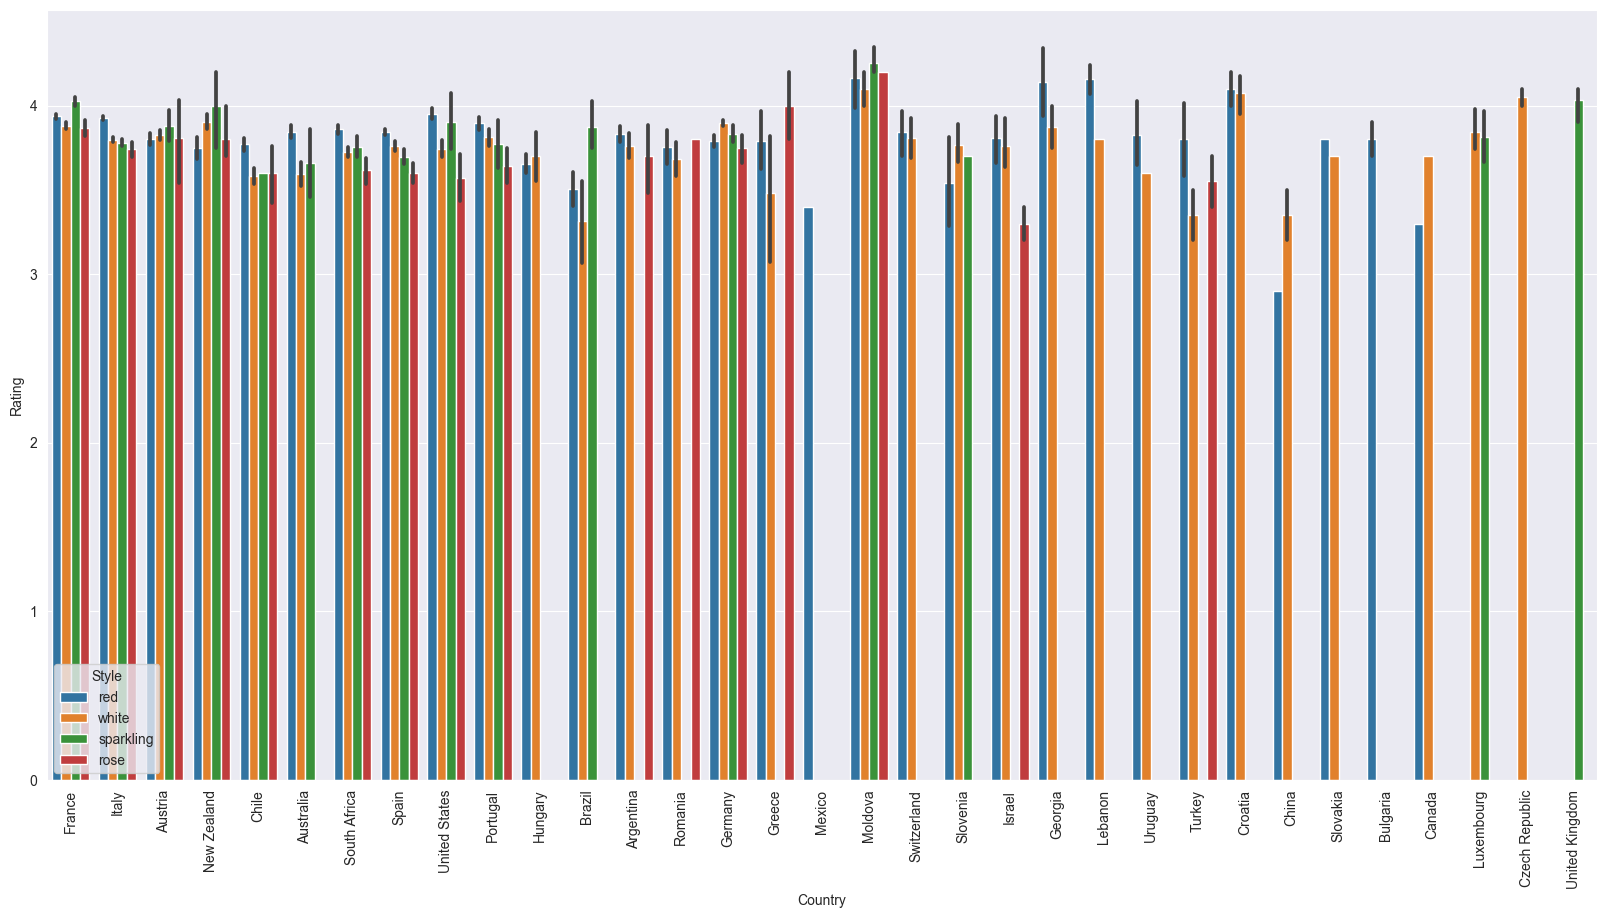

In [230]:
caunt(vino_df)

In [231]:
def pie(wines):
    df_country = wines.groupby(wines['Country'])['Country'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    df_country.plot.pie(autopct='%1.f%%',
                                                                 wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                                 shadow=True,
                                                                 fontsize=20)
    plt.title("% Wise Distribution of Country")

    plt.subplot(122)
    df_country.plot(marker='o',markersize=10,color='red')
    df_country.plot(kind='bar',color='green')
    plt.title("Distribution of Country");
    plt.show()

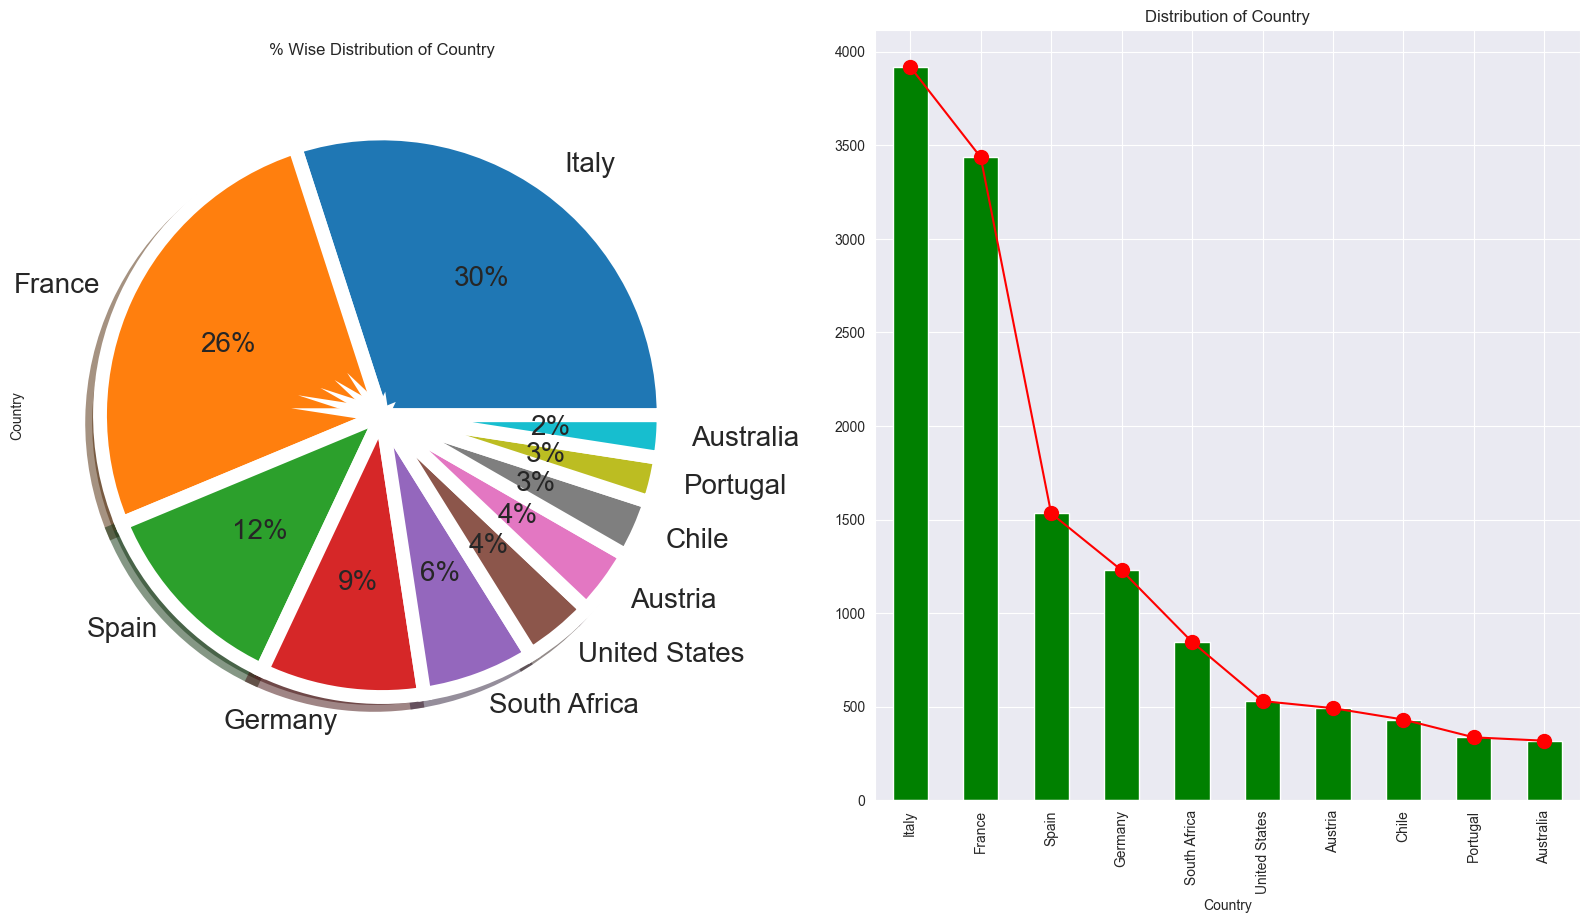

In [232]:
pie(vino_df)

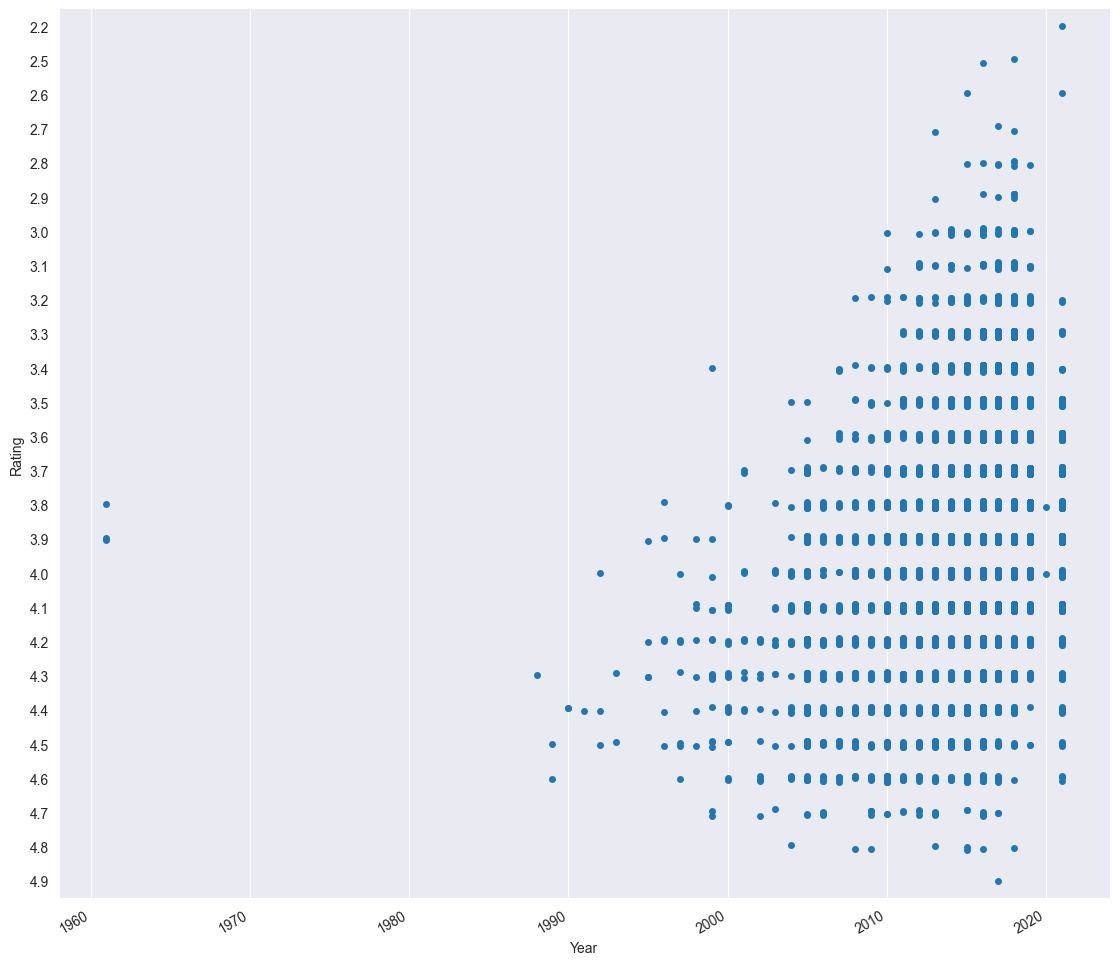

In [233]:
def Year(dataset):
    ax = sns.catplot(x='Year', y='Rating', data=vino_df,orient="h",height=11.30)
    ax.fig.autofmt_xdate()
    plt.show()
    
Year(vino_df)


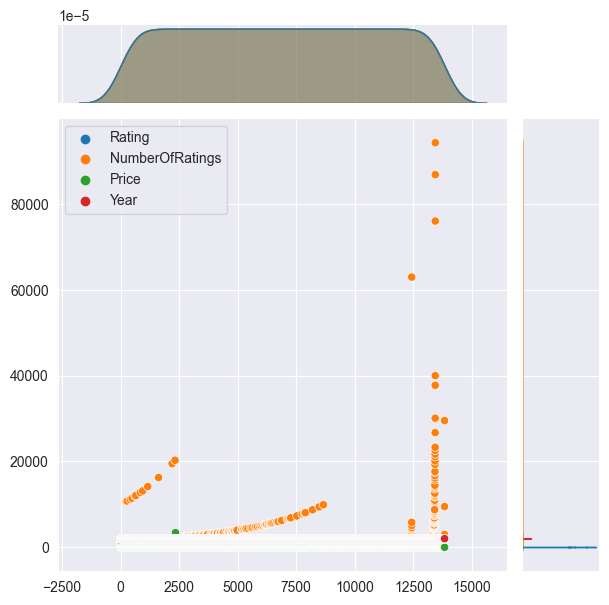

In [234]:
sns.jointplot(data=vino_df)
plt.show()

In [235]:
def Encoder(vino_df):
    vino = pd.get_dummies(vino_df, columns = ['Style'])
    categorical_cols = [col for col in vino.columns if vino[col].dtype == "object"]
    label_encoder = preprocessing.LabelEncoder()
    for col in categorical_cols:
        vino[col] = label_encoder.fit_transform(vino[col])
    return vino

In [236]:
vino_df = Encoder(vino_df)
vino_df

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Style_red,Style_rose,Style_sparkling,Style_white
0,10,574,791,4.2,100,95.00,2011,1,0,0,0
1,10,404,891,4.3,100,15.50,2017,1,0,0,0
2,16,748,2809,3.9,100,7.45,2015,1,0,0,0
3,16,61,559,3.5,100,8.72,2019,1,0,0,0
4,2,143,2289,3.9,100,29.15,2016,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13829,10,393,1823,3.9,1750,9.36,2019,0,1,0,0
13830,10,267,2394,4.0,2046,12.85,2019,0,1,0,0
13831,10,267,1024,4.2,2990,16.47,2019,0,1,0,0
13832,22,809,509,3.5,9493,4.35,2021,0,1,0,0


<Figure size 2000x1000 with 0 Axes>

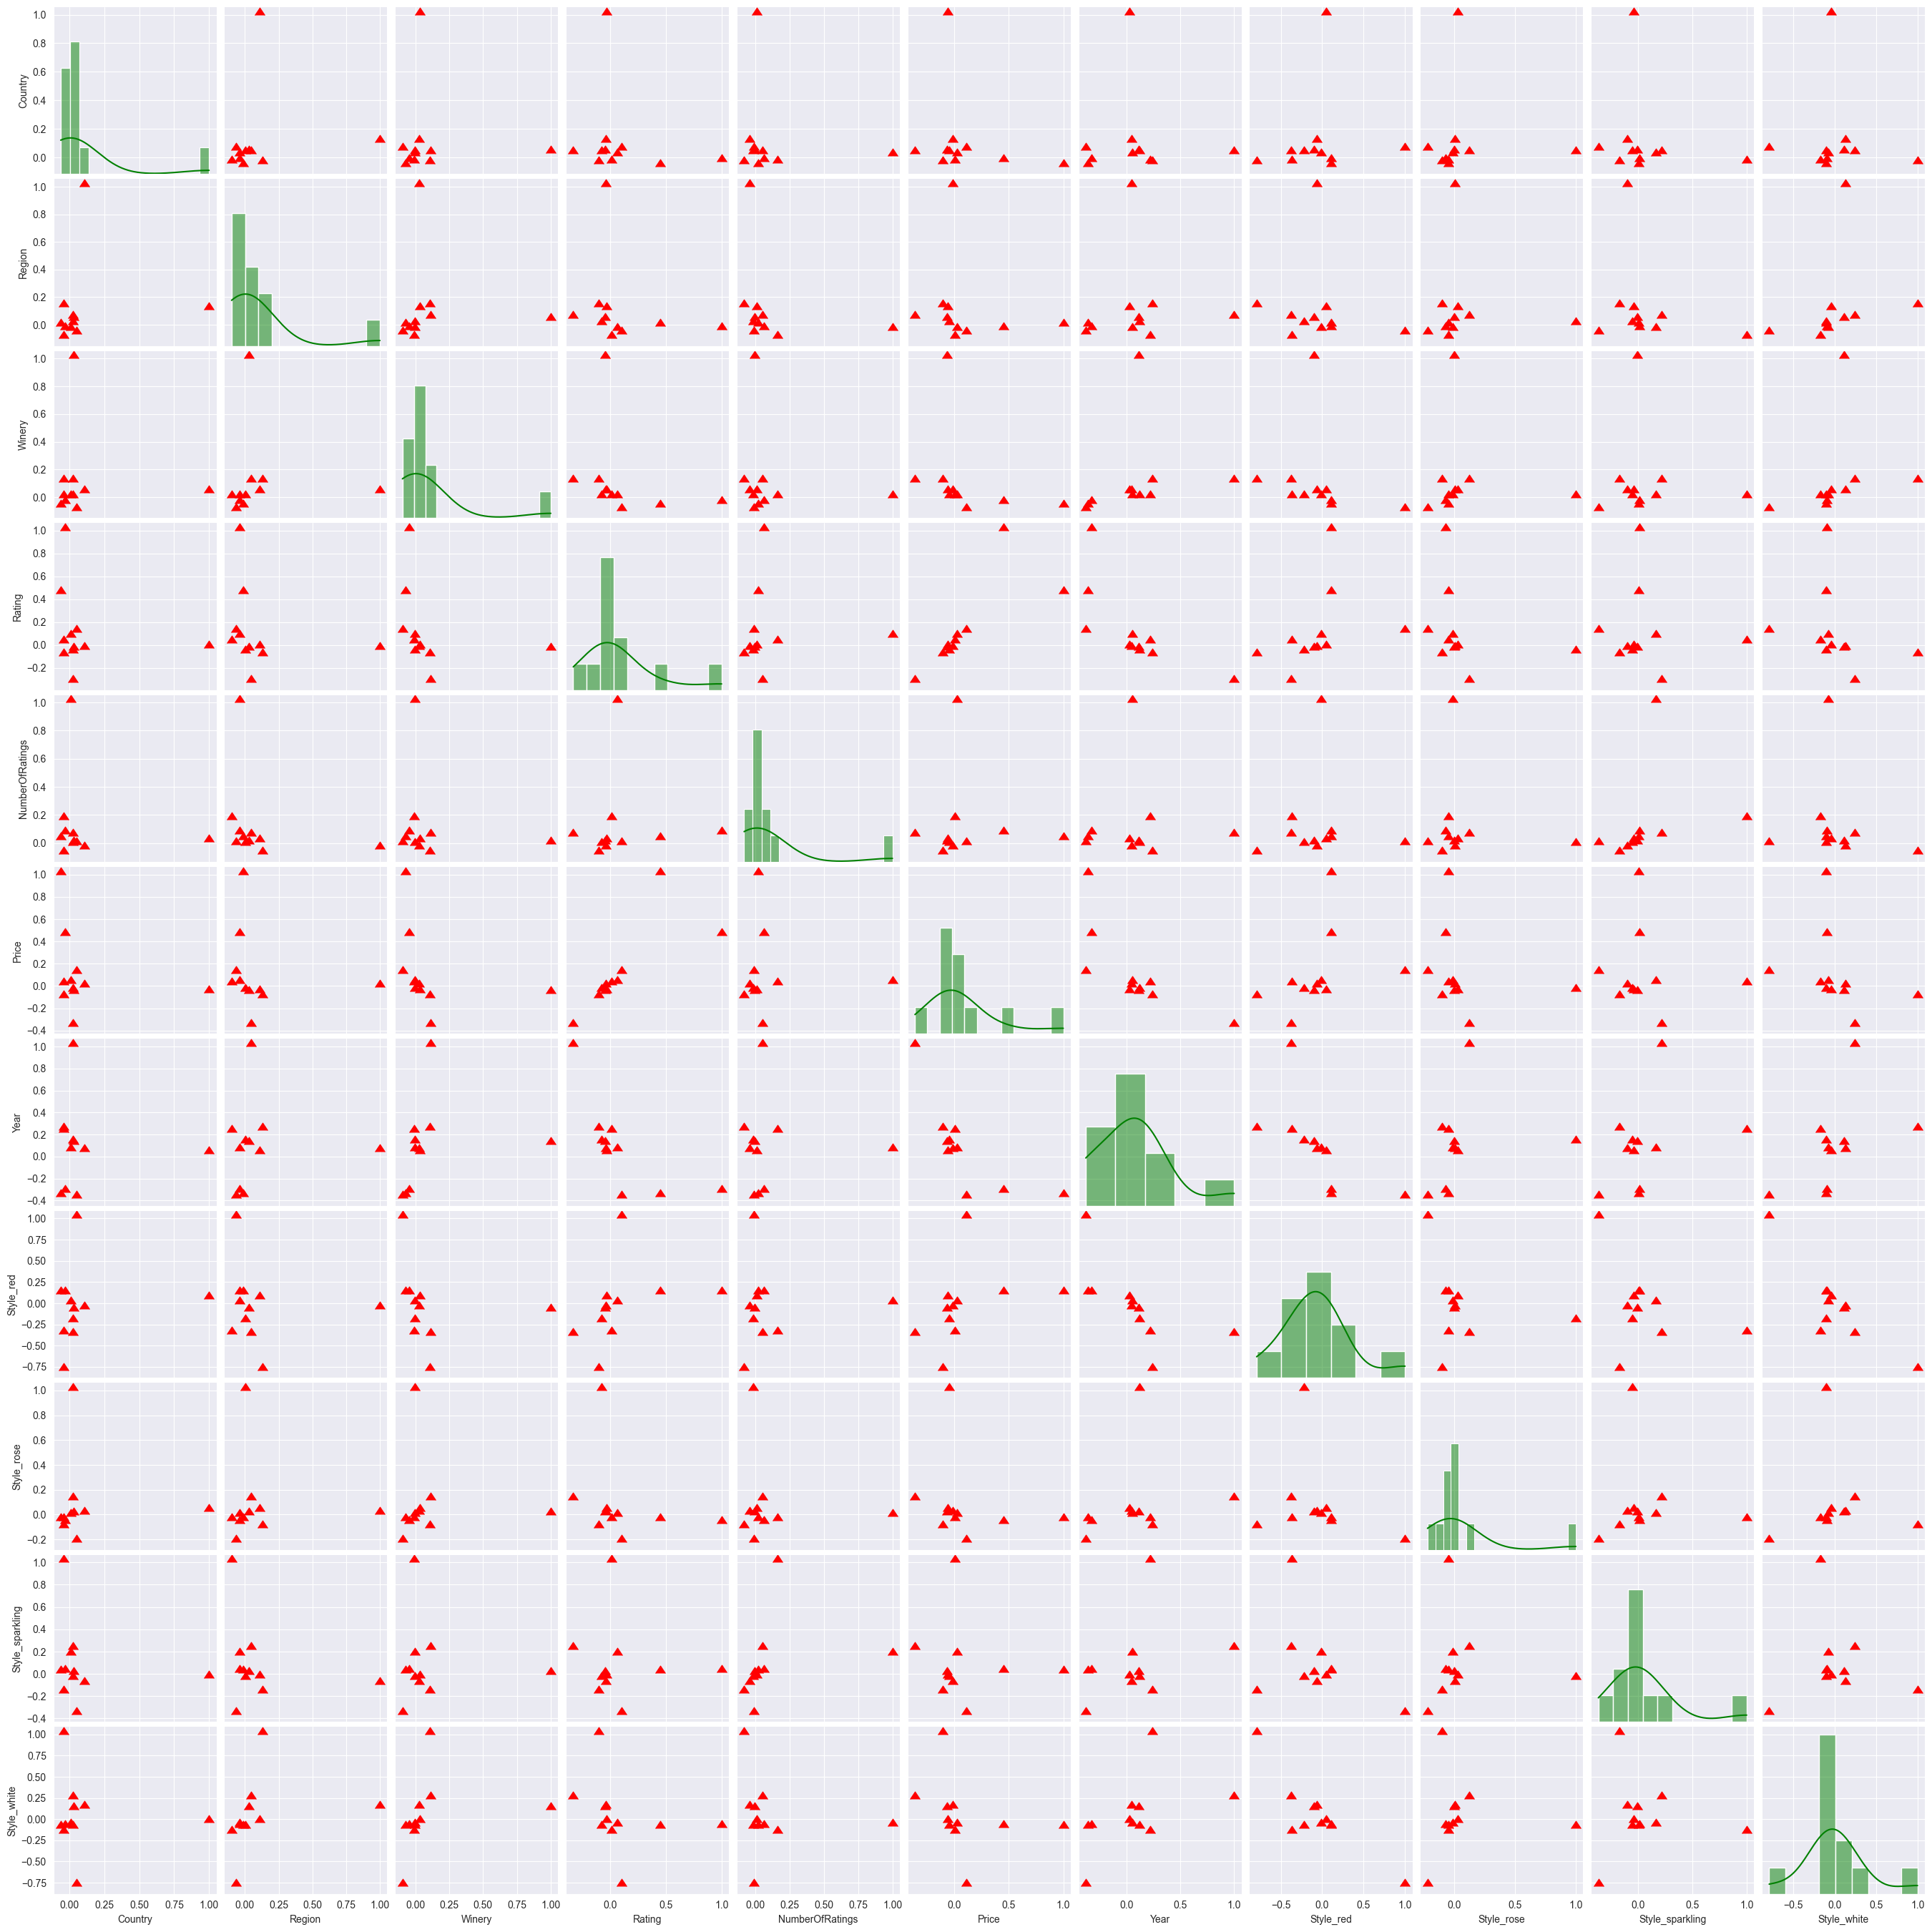

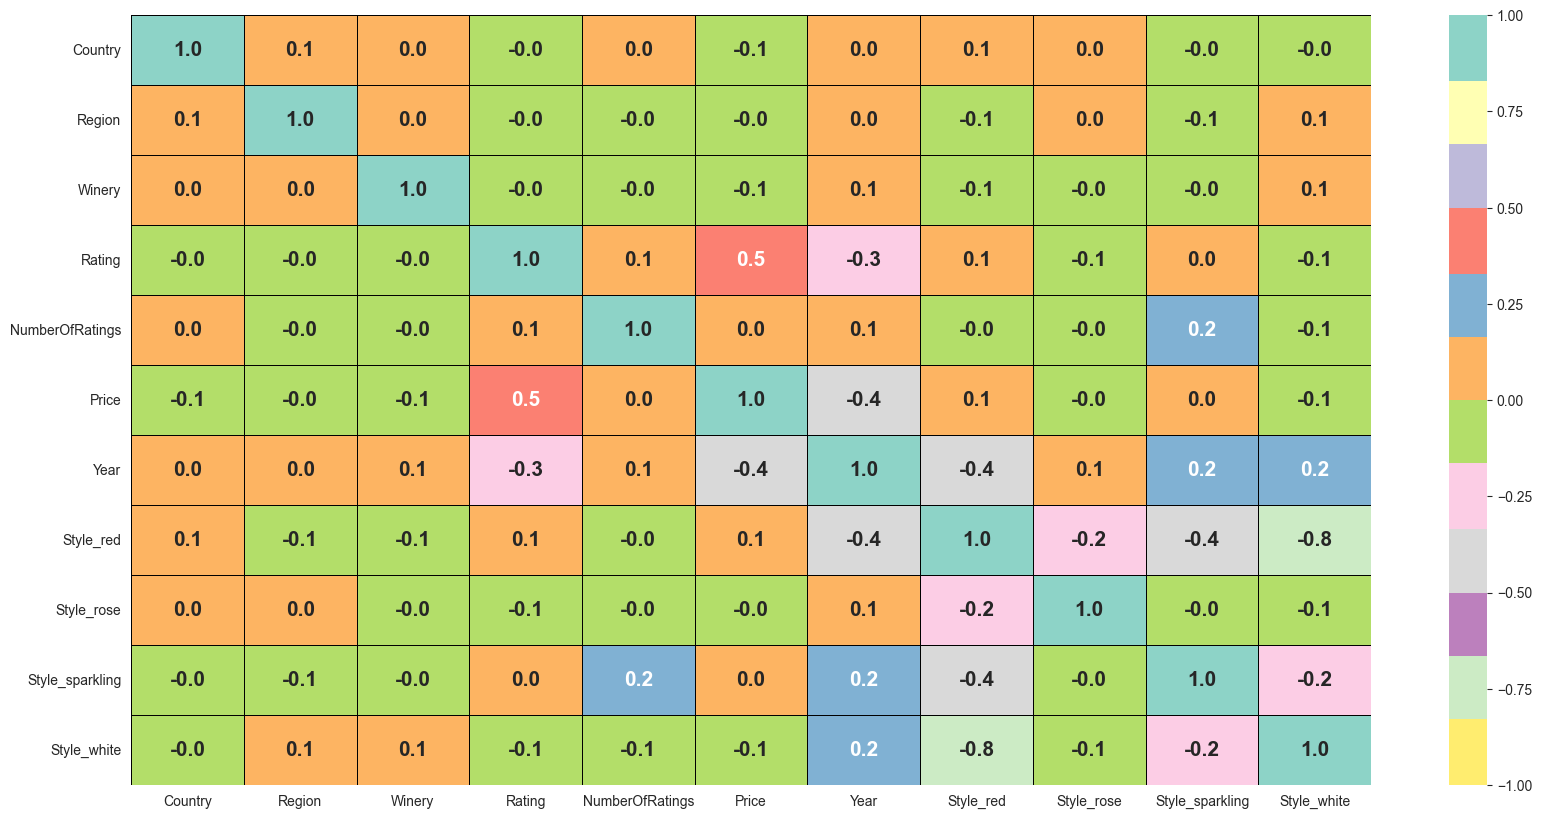

In [237]:
def correlation(vino_df):
    sns.set_style('darkgrid')
    correlations  = vino_df.corr()
    plt.figure(figsize=(20,10))
    sns.pairplot(data=correlations, diag_kws=dict(color='green', kde=TabError), plot_kws=dict(color='red', marker=10, s=100))
    plt.show()
    plt.figure(figsize=(20,10))
    sns.heatmap(correlations, vmin=-1, vmax=1, center=0, cmap='Set3_r', annot=True, fmt='.1f', annot_kws=dict(size=15, weight='bold'), linecolor='black', linewidth=.5)
    plt.show()

correlation(vino_df)

In [238]:
def predic(param_1):
    x = param_1.drop( 'Price', axis=1)
    y = param_1.Price

    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=50)

    # 4.Madel CatBoostRegressor
    madel_1_1  = CatBoostRegressor().fit(x_train, y_train) # practice the model

    # 8.Madel GradientBoostingRegressor
    madel_2_1  = GradientBoostingRegressor().fit(x_train, y_train) # practice the model

    # We test how well our models predict by using the rmse and r2 methods

    list_madels1 = [madel_1_1, madel_2_1 ]  # add the model to the list
    rmse_test =[] # empty list for rmse
    r2_test =[]   # empty list for r2

     # check each model and add the result to the empty lists
    for madel in list_madels1:
      predict = madel.predict(x_test)
      rmse_test.append( round( np.sqrt( mean_squared_error(y_test, predict) ), 2 ) )
      r2_test.append( round(r2_score(y_test, predict)*100 , 1 ) )

     # passing the result to a dataframe
    madel_name = "CatBoostRegressor GradientBoostingRegressor".split()
    result = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index = madel_name)
    return result

In [239]:
predic(vino_df)

Learning rate set to 0.05986
0:	learn: 70.7125498	total: 3ms	remaining: 2.99s
1:	learn: 68.9168596	total: 4.75ms	remaining: 2.37s
2:	learn: 67.2783655	total: 6.18ms	remaining: 2.05s
3:	learn: 65.7653880	total: 7.44ms	remaining: 1.85s
4:	learn: 64.2907567	total: 8.96ms	remaining: 1.78s
5:	learn: 62.9731505	total: 10.2ms	remaining: 1.69s
6:	learn: 61.8036646	total: 11.3ms	remaining: 1.6s
7:	learn: 60.6081678	total: 12.6ms	remaining: 1.56s
8:	learn: 59.6044824	total: 13.8ms	remaining: 1.52s
9:	learn: 58.6266289	total: 15.3ms	remaining: 1.51s
10:	learn: 57.7618912	total: 16.6ms	remaining: 1.49s
11:	learn: 56.7759203	total: 17.8ms	remaining: 1.46s
12:	learn: 55.9643119	total: 19.1ms	remaining: 1.45s
13:	learn: 55.2085385	total: 20.3ms	remaining: 1.43s
14:	learn: 54.5304210	total: 21.5ms	remaining: 1.41s
15:	learn: 53.8108068	total: 22.7ms	remaining: 1.4s
16:	learn: 53.1074289	total: 24ms	remaining: 1.39s
17:	learn: 52.4420019	total: 25.9ms	remaining: 1.42s
18:	learn: 51.9023221	total: 27.2m

,RMSE,R2_Test
CatBoostRegressor,32.35,74.2
GradientBoostingRegressor,34.52,70.6
